In [1]:
# import os
import pandas as pd
import numpy as np
# import regex as re
from collections import defaultdict
# from typing import Tuple, List, NewType
# from tqdm.notebook import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns 
# %config InlineBackend.figure_format = 'retina'

import logging



In [2]:
print(plt.style.available)
plt.style.use('fivethirtyeight')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# Load Epitope Database

In [3]:
Ep_dist_df = pd.read_pickle('./Database Versions/20200804_EpitopevsHLA_distance.pickle')
Ep_dist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Epitope              428 non-null    object 
 1   ElliPro Score        428 non-null    object 
 2   PolymorphicResidues  428 non-null    object 
 3   Luminex Alleles      428 non-null    object 
 4   All Alleles          428 non-null    object 
 5   distance [A]         428 non-null    object 
 6   mean_distance [A]    424 non-null    float64
 7   std_distance [A]     424 non-null    float64
dtypes: float64(2), object(6)
memory usage: 30.1+ KB


# Manual Distance Assignment

In [4]:
# Ep_dist_df[Ep_dist_df.Epitope=='275EL']['Luminex Alleles'].values

In [5]:
Ep_dist_df[Ep_dist_df['mean_distance [A]'].isna()]

,Epitope,ElliPro Score,PolymorphicResidues,Luminex Alleles,All Alleles,distance [A],mean_distance [A],std_distance [A]
104,95F,Low,"[(95, F)]",{C*07:04},"{C*07:11, C*07:12, C*07:45, C*07:63, A*02:84, ...",{},NaN,NaN
219,275EL,High,"[(275, E), (276, L)]","{A*30:02, A*36:01, A*01:01, A*11:01, A*03:01, ...","{A*01:10, A*11:09, A*11:34, A*01:12, A*30:12, ...",{},NaN,NaN
220,275G,High,"[(275, G)]","{C*05:01, C*08:02, C*08:01}","{C*05:21, C*08:08, C*05:03, C*08:04, C*08:03, ...",{},NaN,NaN
345,3P,High,"[(3, P)]",{DQB1*06:01},{DQB1*06:01},{},NaN,NaN


In [6]:
# The below Epitopes should be further investigated
Ep_dist_df[Ep_dist_df['mean_distance [A]'].isna()]

,Epitope,ElliPro Score,PolymorphicResidues,Luminex Alleles,All Alleles,distance [A],mean_distance [A],std_distance [A]
104,95F,Low,"[(95, F)]",{C*07:04},"{C*07:11, C*07:12, C*07:45, C*07:63, A*02:84, ...",{},NaN,NaN
219,275EL,High,"[(275, E), (276, L)]","{A*30:02, A*36:01, A*01:01, A*11:01, A*03:01, ...","{A*01:10, A*11:09, A*11:34, A*01:12, A*30:12, ...",{},NaN,NaN
220,275G,High,"[(275, G)]","{C*05:01, C*08:02, C*08:01}","{C*05:21, C*08:08, C*05:03, C*08:04, C*08:03, ...",{},NaN,NaN
345,3P,High,"[(3, P)]",{DQB1*06:01},{DQB1*06:01},{},NaN,NaN


In [7]:
Ep_dist_df[Ep_dist_df.Epitope=='95F']['All Alleles'].values

array([{'C*07:11', 'C*07:12', 'C*07:45', 'C*07:63', 'A*02:84', 'C*04:40', 'C*07:04'}],
      dtype=object)

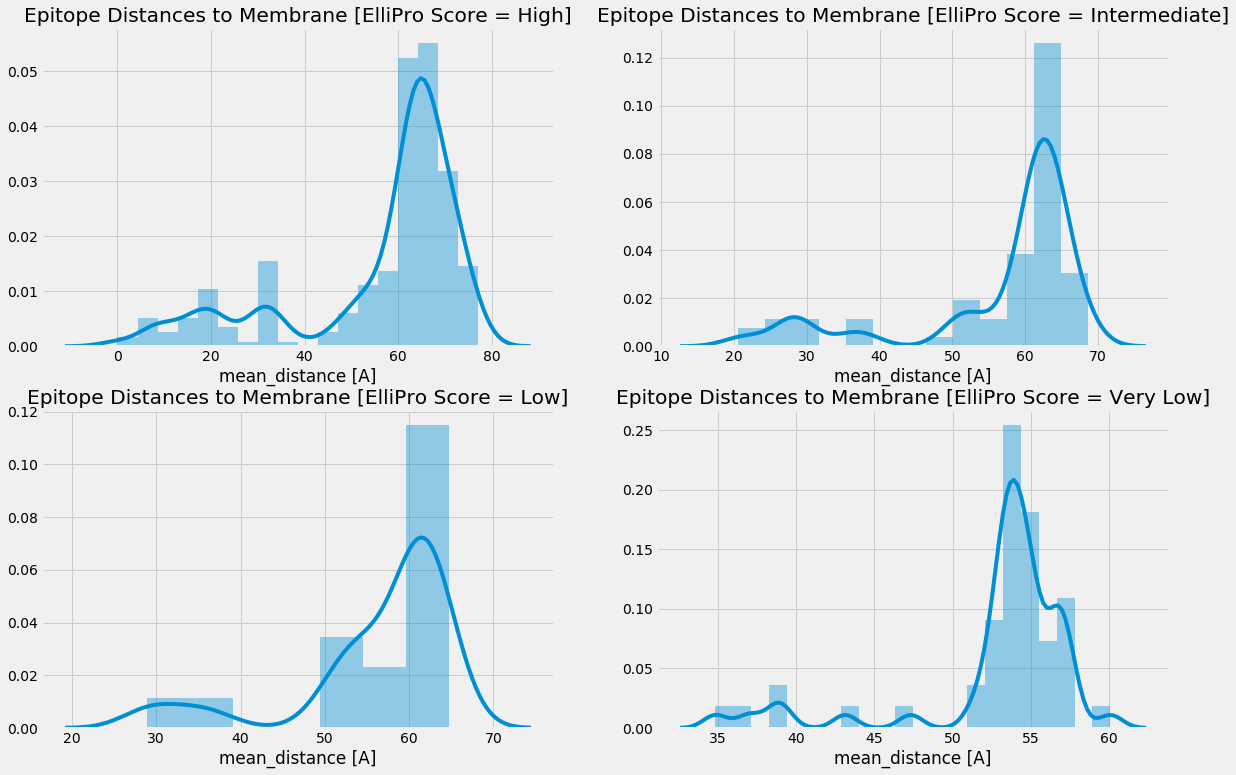

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
ind = Ep_dist_df['ElliPro Score'] == 'High'
sns.distplot(Ep_dist_df[ind]['mean_distance [A]'].dropna(), norm_hist=True, ax=ax[0,0]);
ax[0,0].set_title('Epitope Distances to Membrane [ElliPro Score = High]');

ind = Ep_dist_df['ElliPro Score'] == 'Intermediate'
sns.distplot(Ep_dist_df[ind]['mean_distance [A]'].dropna(), norm_hist=True, ax=ax[0,1]);
ax[0,1].set_title('Epitope Distances to Membrane [ElliPro Score = Intermediate]');

ind = Ep_dist_df['ElliPro Score'] == 'Low'
sns.distplot(Ep_dist_df[ind]['mean_distance [A]'].dropna(), norm_hist=True, ax=ax[1,0]);
ax[1,0].set_title('Epitope Distances to Membrane [ElliPro Score = Low]');

ind = Ep_dist_df['ElliPro Score'] == 'Very Low'
sns.distplot(Ep_dist_df[ind]['mean_distance [A]'].dropna(), norm_hist=True, ax=ax[1,1]);
ax[1,1].set_title('Epitope Distances to Membrane [ElliPro Score = Very Low]');
fig.savefig('overview.pdf')

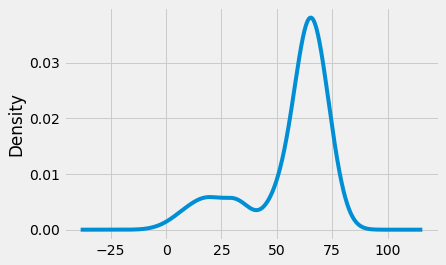

In [11]:
Ep_dist_df[Ep_dist_df['ElliPro Score']=='High'].mean_distance.plot(kind='kde');